In [1]:
from operator import itemgetter
import networkx as nx
import wikipedia
SEED = "Complex network".title()
STOPS = ("International Standard Serial Number",
"International Standard Book Number",
"National Diet Library",
"International Standard Name Identifier",
"International Standard Book Number (Identifier)",
"Pubmed Identifier", "Pubmed Central",
"Digital Object Identifier", "Arxiv",
"Proc Natl Acad Sci Usa", "Bibcode",
"Library Of Congress Control Number", "Jstor")

In [2]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set()

In [3]:
F = nx.DiGraph()
layer, page = todo_lst[0]

In [4]:
while layer < 2:
    del todo_lst[0]
    done_set.add(page)
    print(layer, page) # Show progress
    try:
        wiki = wikipedia.page(page)
    except:
        layer, page = todo_lst[0]
        print("Could not load", page)
        continue
    for link in wiki.links:
        link = link.title()
        if link not in STOPS and not link.startswith("List Of"):
            if link not in todo_set and link not in done_set:
                todo_lst.append((layer + 1, link))
                todo_set.add(link)
            F.add_edge(page, link)
    layer, page = todo_lst[0]
print("{} nodes, {} edges".format(len(F), nx.number_of_edges(F)))


0 Complex Network
1 Adjacency List
1 Adjacency Matrix
1 Agent-Based Model
1 Albert-László Barabási
1 Arxiv (Identifier)
1 Artificial Neural Network
1 Assortativity
1 Autonomous System (Internet)
1 Balance Theory
1 Barabási–Albert Model
1 Bianconi–Barabási Model
1 Bibcode (Identifier)
1 Biological Network
1 Biology
1 Bipartite Graph
1 Blockmodeling
Could not load Boolean Network
1 Boolean Network
1 Branching Process
1 Centrality
1 Climate
1 Climate Networks
1 Clique (Graph Theory)
1 Clustering Coefficient
1 Combinatorial Optimization
1 Community Structure
1 Complete Graph
1 Complex Networks
1 Complex Adaptive System
1 Complex Contagion
1 Complex Systems
1 Computer Network
1 Computer Science
1 Connected Component (Graph Theory)
1 Connectome
Could not load Cut (Graph Theory)
1 Cut (Graph Theory)
1 Cycle (Graph Theory)
1 Degree (Graph Theory)
1 Degree Distribution
1 Dependency Network
1 Directed Graph
1 Distance (Graph Theory)
1 Doi (Identifier)
1 Dual-Phase Evolution
1 Duncan J. Watts
1 D

C:\ProgramData\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\ProgramData\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Poisson Distribution
1 Poisson Distribution
Could not load Power-Law
1 Power-Law
1 Power Law
1 Preferential Attachment
1 Random Geometric Graph
1 Random Graph
1 Random Graph Theory Of Gelation
1 Random Regular Graphs
1 Reciprocity (Network Science)
1 Reciprocity In Network
1 Regular Lattices
1 S2Cid (Identifier)
1 Sir Model
1 Scale-Free Network
1 Scale-Free Networks
1 Scientific Collaboration Network
1 Semantic Network
1 Six Degrees Of Separation
1 Small-World Network
1 Small-World Networks
1 Small-World Phenomenon
1 Small World Networks
1 Social Capital
1 Social Influence
1 Social Network
1 Social Network Analysis Software
1 Sociology
1 Soft Configuration Model
1 Spatial Network
1 Stanley Milgram
1 Steven Strogatz
1 Stochastic Block Model
1 Telecommunications Network
1 Topological
1 Transitive Relation
1 Transport Network
1 Triadic Closure
1 Trophic Coherence
1 Vertex (Graph Theory)
1 Watts–Strogatz Model
1 Weighted Network
1 World Wide Web
1 Yule-Simon Distribution
141

In [6]:
# F.remove_edges_from(F.selfloop_edges())
# duplicates = [(node, node + "s") for node in F if node + "s" in F]
# for dup in duplicates:
#     F = nx.contracted_nodes(F, *dup, self_loops=False)
# duplicates = [(x, y) for x, y
#     in [(node, node.replace("-", " ")) for node in F]
#     if x != y and y in F]
# for dup in duplicates:
#     F = nx.contracted_nodes(F, *dup, self_loops=False)
# nx.set_node_attributes(F, "contraction", 0)

In [7]:
# remove nodes that connect with just obne other node
core = [node for node, deg in F.degree().items() if deg >= 2]
G = nx.subgraph(F, core)
print("{} nodes, {} edges".format(len(G), nx.number_of_edges(G)))
# 2995 nodes, 11817 edges
nx.write_graphml(G, "cna.graphml")

AttributeError: 'DiDegreeView' object has no attribute 'items'

In [9]:
F.edges()

OutEdgeView([('Complex Network', 'Adjacency List'), ('Complex Network', 'Adjacency Matrix'), ('Complex Network', 'Agent-Based Model'), ('Complex Network', 'Albert-László Barabási'), ('Complex Network', 'Arxiv (Identifier)'), ('Complex Network', 'Artificial Neural Network'), ('Complex Network', 'Assortativity'), ('Complex Network', 'Autonomous System (Internet)'), ('Complex Network', 'Balance Theory'), ('Complex Network', 'Barabási–Albert Model'), ('Complex Network', 'Bianconi–Barabási Model'), ('Complex Network', 'Bibcode (Identifier)'), ('Complex Network', 'Biological Network'), ('Complex Network', 'Biology'), ('Complex Network', 'Bipartite Graph'), ('Complex Network', 'Blockmodeling'), ('Complex Network', 'Boolean Network'), ('Complex Network', 'Branching Process'), ('Complex Network', 'Centrality'), ('Complex Network', 'Climate'), ('Complex Network', 'Climate Networks'), ('Complex Network', 'Clique (Graph Theory)'), ('Complex Network', 'Clustering Coefficient'), ('Complex Network', 

In [10]:
nx.write_graphml(F, "Wikipaedia.graphml")


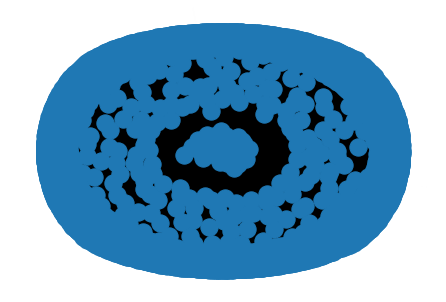

In [12]:
import matplotlib.pyplot as plt
nx.draw(F)

In [ ]:
top_indegree = sorted(G.in_degree().items(),
                    reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))